BlackJAX is a library of samplers for JAX that works on CPU as well as GPU.

It is not a probabilistic programming library. However it integrates really well with PPLs as long as they can provide a (potentially unnormalized) log-probability density function compatible with JAX.

In [3]:
pip install jax jaxlib

In [4]:
pip install blackjax

     |████████████████████████████████| 74 kB 2.2 MB/s 


ArviZ is a Python package for exploratory analysis of Bayesian models it offers data structures for manipulating data common in Bayesian analysis, like numerical samples from the posterior, prior predictive and posterior predictive distributions as well as observed data.

In [5]:
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

Importing libraries that we'll need for our task


*   matplotlib.pylot : matplotlib. pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc

*   pymc3 : PyMC is a Python package for Bayesian statistical modeling and probabilistic machine learning which focuses on advanced Markov chain Monte Carlo and variational fitting algorithms.



In [13]:
import jax
import jax.numpy as jnp
import jax.scipy.stats as stats
import blackjax
import matplotlib.pyplot as plt
from jax import random
import pymc3 as pm

JAX's random number generation differs from NumPy's in important ways. The reason is that NumPy's PRNG design makes it hard to simultaneously guarantee a number of desirable properties for JAX, specifically that code must be:

reproducible,
parallelizable,
vectorisable.
A key is just an array of shape (2,).

'Random key' is essentially just another word for 'random seed'. However, instead of setting it once as in NumPy, any call of a random function in JAX requires a key to be specified. Random functions consume the key, but do not modify it. Feeding the same key to a random function will always result in the same sample being generated:

In [10]:
seed = 0
key = random.PRNGKey(seed)

size = 200
x  = jnp.linspace(0, 1, size)
xb = 1 + 2 * x
y = 1 + 2 * x + random.normal(key, (size, ))

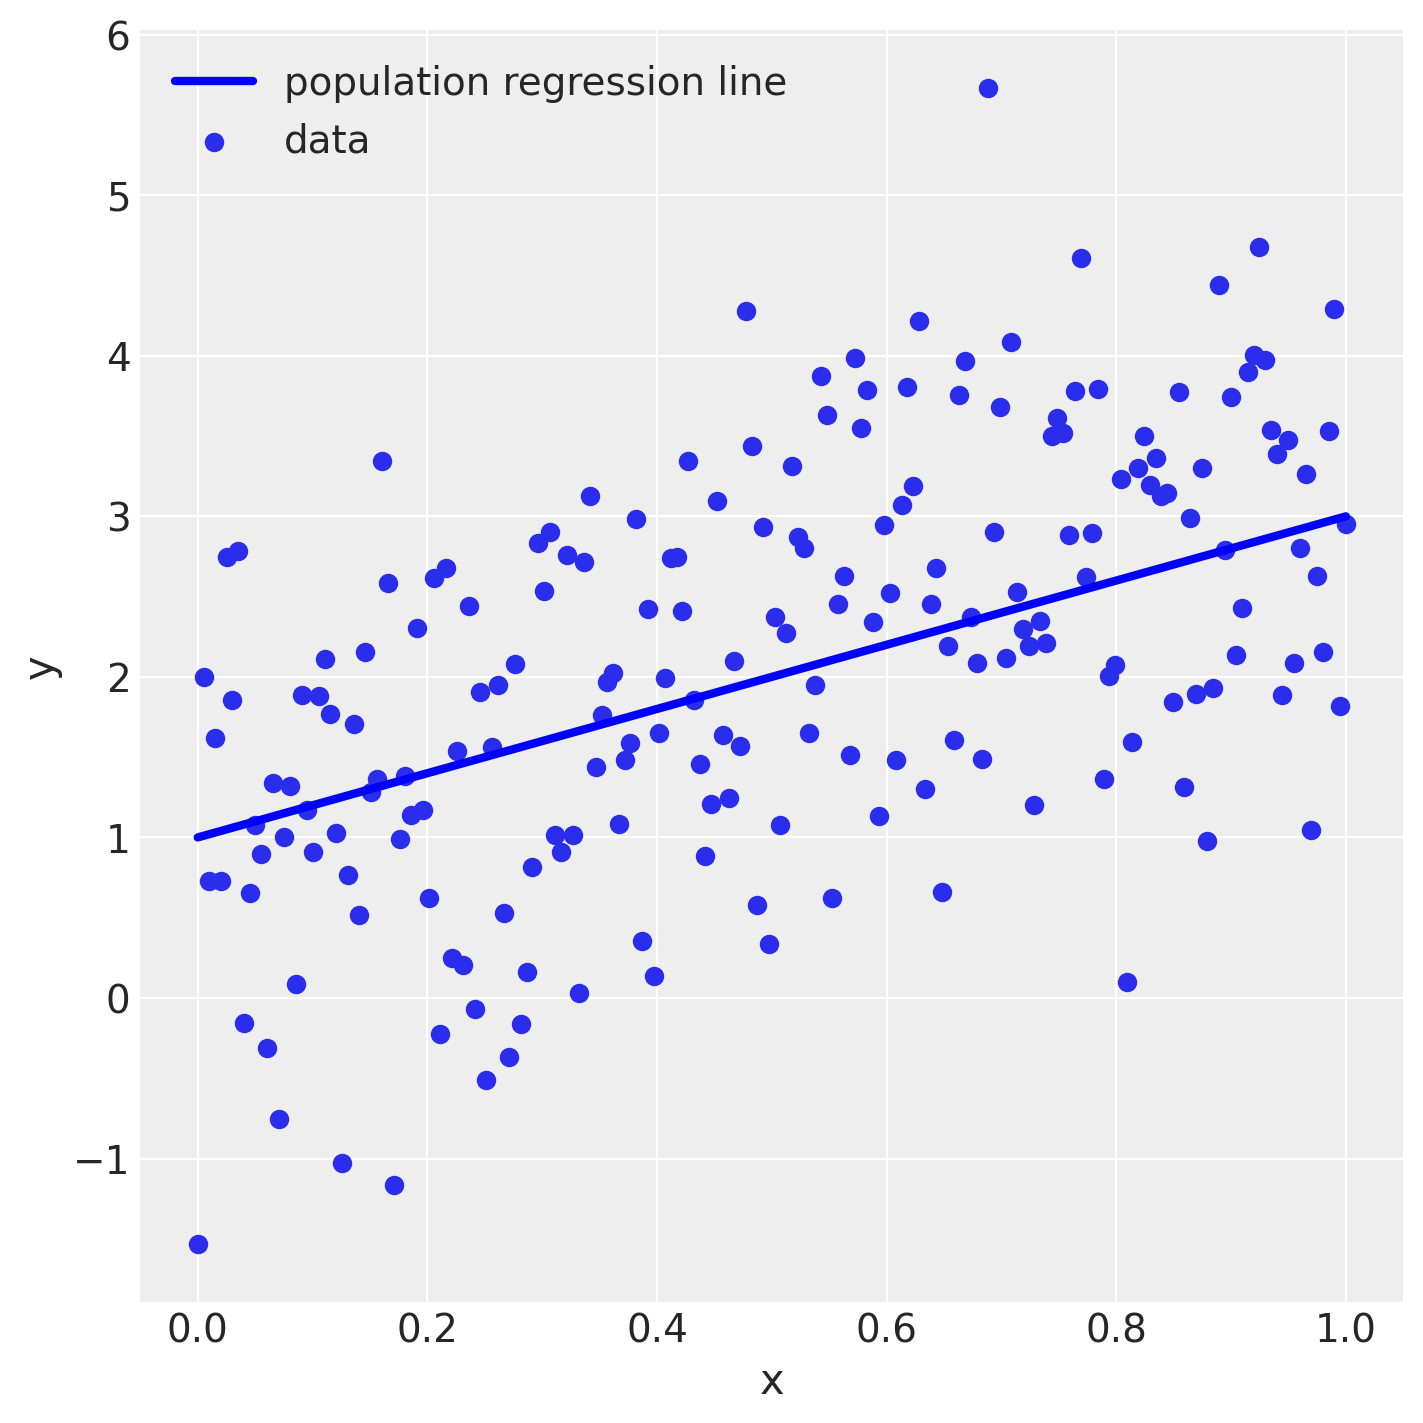

In [11]:
fig = plt.figure(figsize=(7, 7))

plt.scatter(x, y, label="data")
plt.plot(x, xb, label="population regression line", c='blue', lw=3)
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

**Bayesian linear regression** is an approach to linear regression in which the statistical analysis is undertaken within the context of Bayesian inference. 
The aim of Bayesian Linear Regression is not to find the single “best” value of the model parameters, but rather to determine the posterior distribution for the model parameters.


In [14]:
with pm.Model() as model:
    
    # Defining priors
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    x_coeff = pm.Normal("x", 0, sigma=20)

    # Defining likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x, sigma=sigma, observed=y)

    # Inference
    trace = pm.sample(10000, cores=16, return_inferencedata=True)

Plotting posterior predictive regression lines, population regression line and data-points on a graph 

/usr/local/lib/python3.7/dist-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


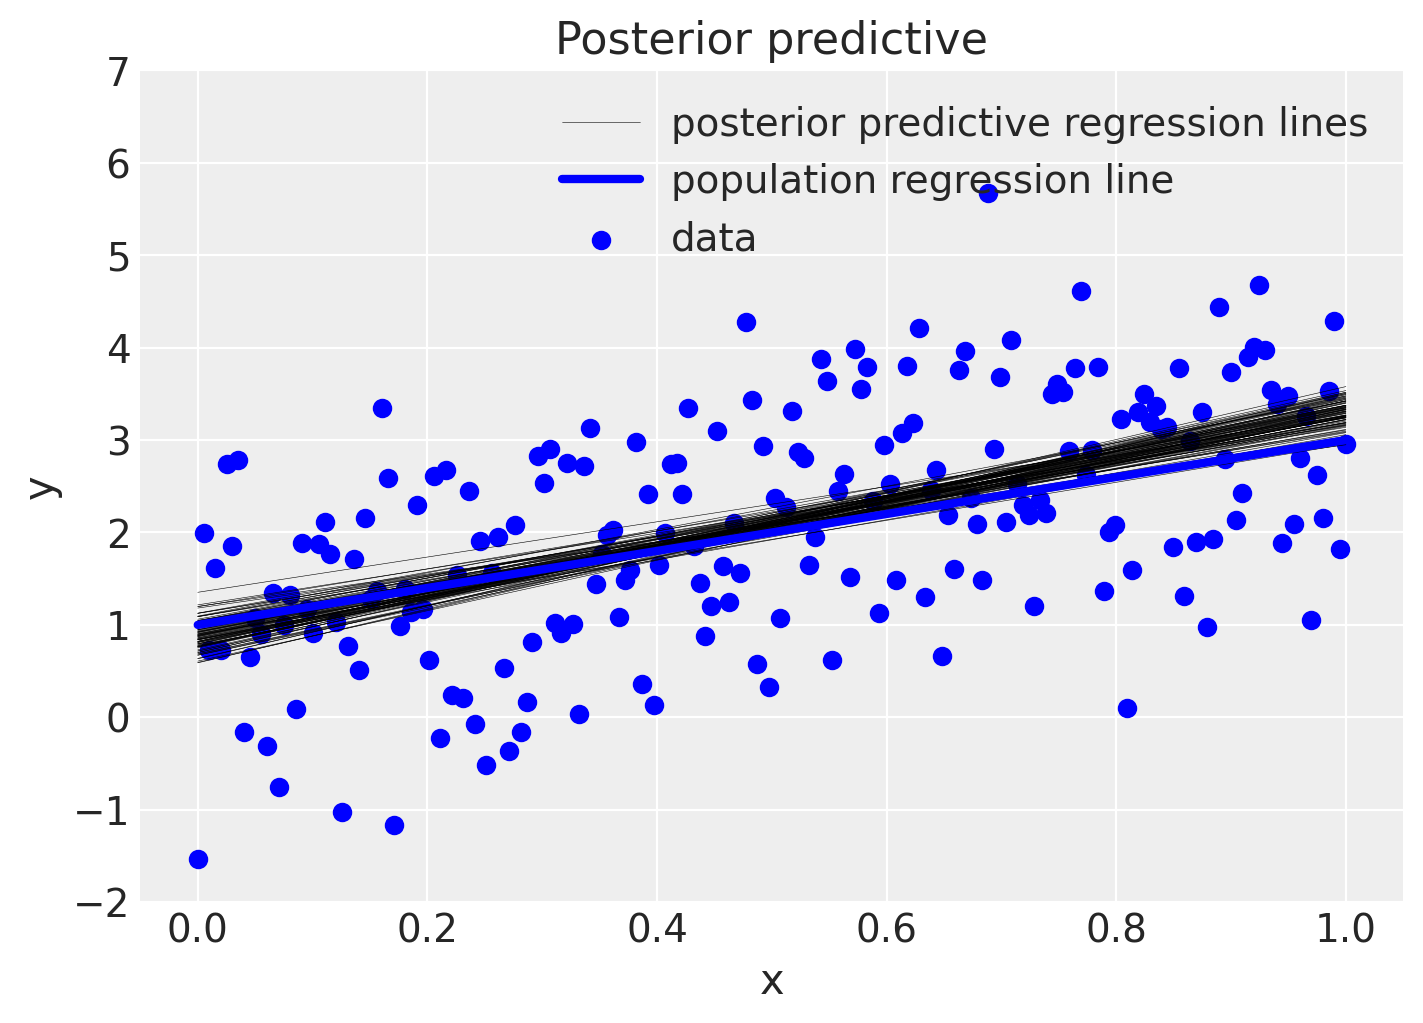

In [15]:
plt.figure(figsize=(7, 5))

plt.scatter(x, y, c='blue', label="data")
pm.plot_posterior_predictive_glm(trace, samples=100, label="posterior predictive regression lines")
plt.plot(x, xb, label="population regression line", lw=3.0, c="b", linestyle='solid')

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2,7)

plt.legend()

plt.show()